In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import csv
import pandas as pd
from keras.preprocessing import image
from tensorflow import keras
from tensorflow import lite
#load library untuk train test split
from sklearn.model_selection import train_test_split
import shutil
from tqdm.notebook import tqdm as tq


In [2]:
import Augmentor
import os

def perbanyak_(ini, sebanyak_ini):
    source_dir = ini
    output_dir = "."
    p = Augmentor.Pipeline(source_directory=source_dir, output_directory=output_dir)
    #p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=1)
    p.rotate(probability=0.7, max_left_rotation=13, max_right_rotation=13)
    p.zoom_random(probability=0.5, percentage_area=0.9)
    p.crop_random(probability=0.6, percentage_area=0.9)
    p.resize(probability=1.0, width=64, height=64)

    p.sample(sebanyak_ini)

perbanyak_("batuan/giokhijau", 1000)
perbanyak_("batuan/kecubungungu", 1000)

Initialised with 1032 image(s) found.
Output directory set to batuan/giokhijau\..

Processing <PIL.Image.Image image mode=RGBA size=64x64 at 0x230785AB640>: 100%|█| 1000/1000 [00:09<00:00, 109.48 Sample


Initialised with 1008 image(s) found.
Output directory set to batuan/kecubungungu\..

Processing <PIL.Image.Image image mode=RGBA size=64x64 at 0x230786D4BE0>: 100%|█| 1000/1000 [00:11<00:00, 86.74 Samples


In [ ]:
import cv2
import glob
import random 
import numpy as np

x=[]
y=[]

for gambar in glob.glob("batuan/batukali/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(0)
for gambar in glob.glob("batuan/badarbesi/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(1)
for gambar in glob.glob("batuan/badarlumut/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(2)
for gambar in glob.glob("batuan/giokhijau/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(3)
for gambar in glob.glob("batuan/giokbiru/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(4)
for gambar in glob.glob("batuan/giokmerah/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(5)
for gambar in glob.glob("batuan/kecubungungu/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(6)

z = list(zip(x, y))
random.shuffle(z)
x, y = zip(*z)
x = np.asarray(x)
y = np.asarray(y)

In [ ]:
x.shape

In [ ]:
y

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=(64,64,3), activation="relu"))
model.add(Conv2D(16, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3,3), activation="relu"))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(7, activation="softmax"))


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                  

In [ ]:
history = model.fit(x,y,batch_size=2, epochs=20, validation_split=0.2)

In [ ]:
from matplotlib import pyplot as plt
# Plot history: MAE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Plot history: MSE
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
model.save('percobaan1.h5')

In [23]:
model.load_weights('percobaan1.h5')

In [24]:
import cv2
import glob
import random 
import numpy as np

x=[]
y=[]

for gambar in glob.glob("dataset/test/batukali/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(0)
for gambar in glob.glob("dataset/test/badarbesi/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(1)
for gambar in glob.glob("dataset/test/badarlumut/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(2)
for gambar in glob.glob("dataset/test/giokhijau/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(3)
for gambar in glob.glob("dataset/test/giokbiru/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(4)
for gambar in glob.glob("dataset/test/giokmerah/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(5)
for gambar in glob.glob("dataset/test/kecubungungu/*"):
    ini=cv2.imread(gambar)
    ini=cv2.resize(ini,(64,64))/255
    x.append(ini)
    y.append(6)



In [25]:
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix

ypred = model.predict(np.asarray(x))
ypred = np.argmax(ypred, axis=1)

2/2 [==============================] - 1s 78ms/step


In [26]:
accuracy_score(ypred,y)

0.8571428571428571

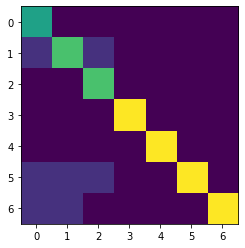

In [27]:
cm= confusion_matrix(ypred,y)
plt.imshow(cm)

In [29]:
cm

array([[4, 0, 0, 0, 0, 0, 0],
       [1, 5, 1, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 0, 0],
       [0, 0, 0, 0, 7, 0, 0],
       [1, 1, 1, 0, 0, 7, 0],
       [1, 1, 0, 0, 0, 0, 7]], dtype=int64)